# Gary Swider - Capstone - RI Traffic Stops Analysis

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
import xlrd
import datetime

In [2]:
cd /Users/GPS10/Desktop/GSwiderCapstone/

C:\Users\GPS10\Desktop\GSwiderCapstone


First, we read in the CSV file, provided by Kaggle. We then remove any unnecessary columns from the dataframe. Then, we preview the data set.

In [3]:
data_set= pd.read_csv("police.csv")
data_set.drop(['violation_raw','search_conducted', 'stop_outcome','is_arrested','stop_duration','drugs_related_stop'], axis = 'columns', inplace= True)
data_set.dropna(subset=['stop_date','stop_time'], inplace = True)
data_set

,stop_date,stop_time,driver_gender,driver_race,violation,district
0,1/4/2005,12:55,M,White,Equipment,Zone X4
1,1/23/2005,23:15,M,White,Speeding,Zone K3
2,2/17/2005,4:15,M,White,Speeding,Zone X4
3,2/20/2005,17:15,M,White,Other,Zone X1
4,2/24/2005,1:20,F,White,Speeding,Zone X3
...,...,...,...,...,...,...
91736,12/31/2015,21:21,F,Black,Moving violation,Zone K2
91737,12/31/2015,21:59,F,White,Speeding,Zone K3
91738,12/31/2015,22:04,M,White,Moving violation,Zone X3
91739,12/31/2015,22:09,F,Hispanic,Equipment,Zone K3


We check for data types and make the appropriate conversions

In [4]:
display(data_set.dtypes)

stop_date        object
stop_time        object
driver_gender    object
driver_race      object
violation        object
district         object
dtype: object

In [5]:
data_set['stop_datetime']= pd.to_datetime(data_set['stop_date'].str.cat(data_set['stop_time'], sep=" "))
data_set['stop_date']= pd.to_datetime(data_set['stop_date'])
data_set['stop_time']= pd.to_datetime(data_set['stop_time'])
data_set['stop_month']=data_set['stop_date'].dt.month

In [6]:
display(data_set.dtypes)

stop_date        datetime64[ns]
stop_time        datetime64[ns]
driver_gender            object
driver_race              object
violation                object
district                 object
stop_datetime    datetime64[ns]
stop_month                int64
dtype: object

In [7]:
data_set.set_index('stop_datetime', inplace=True)

First, let's check if there are any historical trends based on demographic information.

In [8]:
display(data_set['driver_gender'].value_counts())

M    62762
F    23774
Name: driver_gender, dtype: int64

We see above that a majority of the traffic stop offenders are male. By grouping, we can further conclude that the majority of traffic stop offenders are White Males. Additionally, it seems that people who are White, account for most of the traffic stop violations.

In [9]:
female = data_set[data_set['driver_gender']=='F']
male = data_set[data_set['driver_gender']=='M']

print("Gender by Race\n")
display(data_set.groupby('driver_gender')['driver_race'].value_counts())

Gender by Race



driver_gender  driver_race
F              White          18536
               Black           2681
               Hispanic        1953
               Asian            551
               Other             53
M              White          43334
               Black           9604
               Hispanic        7774
               Asian           1838
               Other            212
Name: driver_race, dtype: int64

<AxesSubplot:title={'center':'Traffic Stops by Gender and Race'}, xlabel='driver_gender,driver_race', ylabel='# of Traffic Stops'>

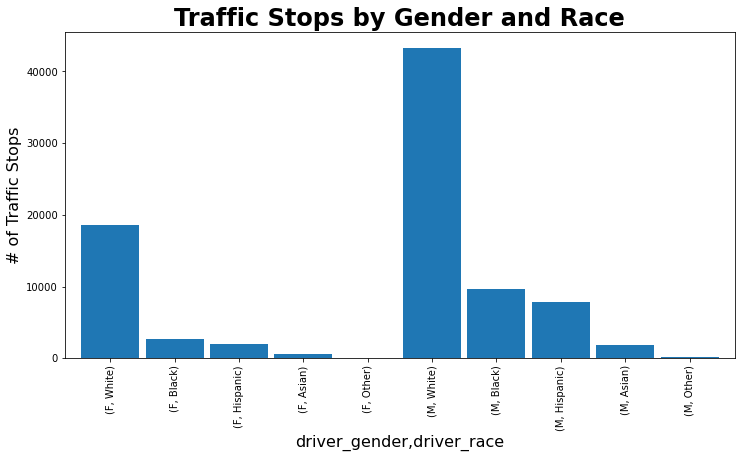

In [10]:
plt.figure(figsize=(12,6))
gender_compare = (data_set.groupby('driver_gender')['driver_race'].value_counts())
plt.ylabel('# of Traffic Stops', fontsize=16)
plt.xlabel('Driver Gender and Race', fontsize=16)
plt.title("Traffic Stops by Gender and Race", fontsize=24, fontweight = 'bold')
gender_compare.plot(width= 0.9, kind='bar')

In [11]:
data_set['stop_date'].value_counts()

2007-05-16    63
2011-09-03    62
2006-01-09    59
2005-11-04    59
2007-01-04    57
              ..
2010-12-26     1
2005-07-24     1
2005-03-29     1
2005-09-20     1
2007-12-25     1
Name: stop_date, Length: 3757, dtype: int64

In [12]:
dates = data_set['stop_date'].value_counts()
data_set.sort_values('stop_date',inplace=True)

<AxesSubplot:title={'center':'Traffic Stops from 2005- 2015'}, xlabel='Year', ylabel='# of Traffic Stops'>

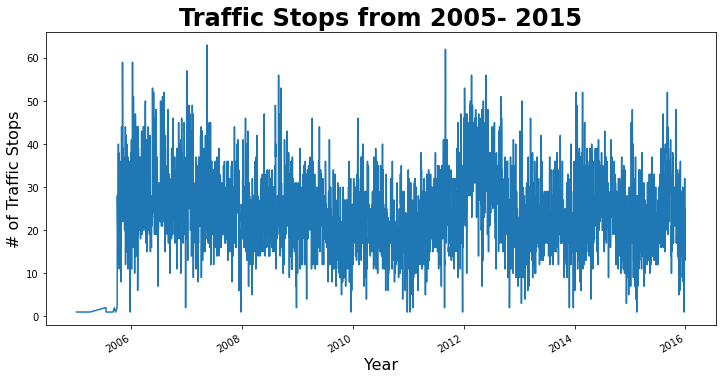

In [13]:
plt.figure(figsize=(12,6))
plt.ylabel('# of Traffic Stops',fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.title("Traffic Stops from 2005- 2015", fontsize = 24, fontweight = 'bold')
dates.plot()

# FIXME Need to change size ^


<AxesSubplot:title={'center':'Traffic Stops from 2005- 2015 by Month'}, xlabel='# of Traffic Stops', ylabel='Month'>

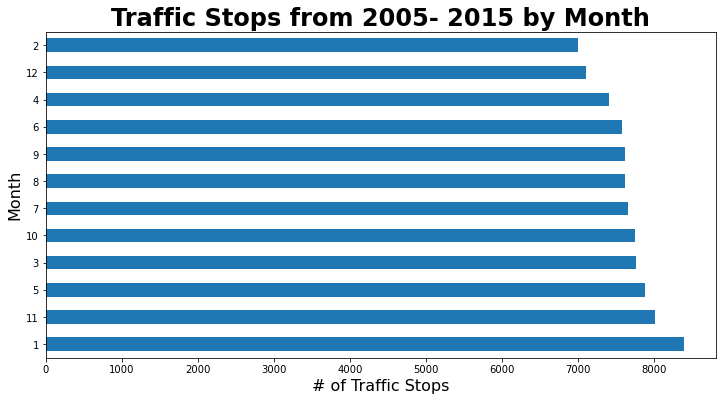

In [14]:
data_set.sort_values('stop_month', inplace=True)
months = data_set['stop_month'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('Month',fontsize = 16)
plt.xlabel('# of Traffic Stops', fontsize = 16)
plt.title("Traffic Stops from 2005- 2015 by Month",fontsize = 24, fontweight = 'bold')
months.plot(kind='barh')

In [15]:
count_data=pd.read_csv("count_table.csv")
count_data

,stop_date,count
0,38356,1
1,38375,1
2,38400,1
3,38403,1
4,38407,1
...,...,...
3752,42365,23
3753,42366,32
3754,42367,13
3755,42368,25


In [16]:
lr = LinearRegression()

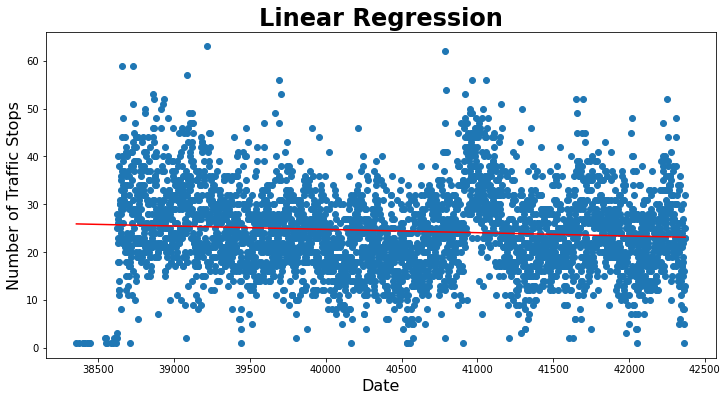

In [17]:
plt.figure(figsize=(12,6))
x=count_data['stop_date'].values
y=count_data['count'].values
lr.fit(x.reshape(-1,1), y )
predict = lr.predict(x.reshape(-1,1))
plt.scatter(x, y)
plt.title('Linear Regression', fontsize=24, fontweight='bold')
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of Traffic Stops', fontsize=16)
plt.plot(count_data['stop_date'].values,predict, color = 'red')


X axis needed to be converted to an integer for Linear Regression. 
Therefore, date was converted to 'absolute day' as [days since 1900-01-01]

In [18]:
lr.coef_

array([-0.00069405])

In [19]:
lr.intercept_

52.51847784952172

Use the converter below to convert a date from number of days since 1/1/1990.

In [20]:
datetime.date(1900,1,1)+datetime.timedelta(44220)

datetime.date(2021, 1, 26)

Now set the x variable to the number from the above converter.

In [21]:
x = 44220

The above number is the number of days since 1-1-1900, 44220 is January 26, 2021.
Change the above number to predict how many traffic stops there will be on that day.

Using y = m*x+b , we can predict the number of stops for a given date.

In [22]:
lr.coef_ * x +lr.intercept_

array([21.82761161])

The Linear Regression model predicted 21.8 traffic stops for January 26, 2021.

## Predict Accuracy

In [28]:
y[110]

21

In [29]:
predict[110]

25.646271628764747

In [25]:
# mean square error

In [26]:
np.mean(y-predict**2)

-572.4225154350962

This prediction model is not very accurate, which shows there is a very weak correlation between the number of traffic stops and the date. There is most likely other factors that effect the number of traffic stops, such as weather, time of day, specific streets/neighborhoods.